In [26]:
import matplotlib.pyplot as plt 
import xarray as xr
import numpy as np
import cmocean 
import cartopy.crs as ccrs
import momlevel as ml

### Load in a Dataset of observed monthly-mean SST from OISST that contains data from January 1993 to Dec 2022. We also load in our land-sea mask for the dataset to be used later in a global mean calculation.

In [27]:
## Load a dataset of SST from OISST and assign to a variable called SST_OISST:
SST_OISST = xr.open_dataset('/home/ees_student/Miranda_Unit5/data/sst.oisst.mon.mean.1993_2022.nc',
                           use_cftime=True)
                           ### this use_cftime=True allows Xarray to interpret time coords as calendar.

## load in a dataset that contains a land-sea mask:
OISST_landsea_mask = xr.open_dataset('/home/ees_student/Miranda_Unit5/data/lsmask.nc')

### Compute and produce a timeseries of the following and describe your observations:
* ### area-weighted global average SST
* ### area-weighted arctic SST (55N to 90N)
* ### area-weighted antarctic SST (55S to 90S)

Text(0, 0.5, 'Mean Sea Surface Temperature (Celsius)')

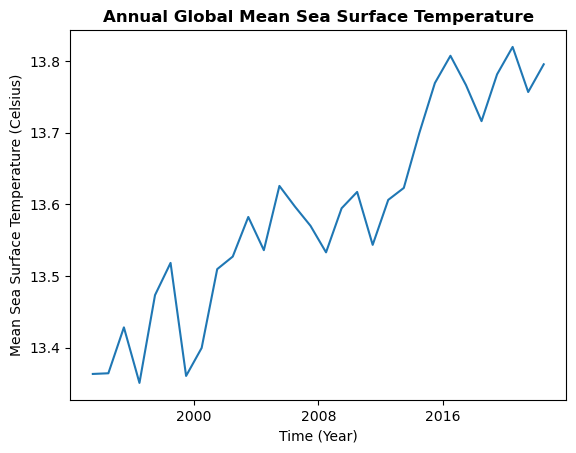

In [28]:
SST = SST_OISST.sst #Make variable of monthly SST data from SST_OISST dataset
SST_annual = ml.util.annual_average(SST, tcoord='time')

SST_annual.mean(dim=['lat','lon']).plot()
plt.title("Annual Global Mean Sea Surface Temperature", fontweight='bold')
plt.xlabel('Time (Year)')
plt.ylabel('Mean Sea Surface Temperature (Celsius)')

In [29]:
import warnings 

def standard_grid_cell_area(lat, lon, rE=6371.0e3):
    """ computes the cell area for a standard spherical grid """

    dLat = lat[1] - lat[0]
    dLon = lon[1] - lon[0]
    area = np.empty((len(lat), len(lon)))
    for j in range(0, len(lat)):
        for i in range(0, len(lon)):
            lon1 = lon[i] + dLon / 2
            lon0 = lon[i] - dLon / 2
            lat1 = lat[j] + dLat / 2
            lat0 = lat[j] - dLat / 2
            area[j, i] = (
                (np.pi / 180.0)
                * rE
                * rE
                * np.abs(np.sin(np.radians(lat0)) - np.sin(np.radians(lat1)))
                * np.abs(lon0 - lon1)
            )
    return area

### Produce a figure with 4 subplots that shows the global seasonal time-averaged (1993 to 2022) SST.

In [30]:
lat_sst = SST_OISST.coords['lat'].values # Defining 1-D numpy array of model's latitude values from SST_OISST variable
lon_sst = SST_OISST.coords['lon'].values # Defining 1-D numpy array of model's longitude values from SST_OISST variable

# make sure to replace the name of the data array if you chose a 
# different name and use the appropriate coordinate names within the ['']
# based on the coordinates of lat / lon in your dataset.

# Pass the arrays to the standard_grid_cell_area function
areacell = standard_grid_cell_area(lat_sst,lon_sst)  

# The areacella_xarray function outputs a new numpy array. Convert this back into 
# and xarray DataArray for further use. If this is a field you will be using 
# often. You may wish to save this newly created DataArray as a Dataset and save 
# as a netcdf file.

# here we assign dimensions and coordinates that are the same as our original SST array:

areacell_xarray = xr.DataArray(areacell,dims=({'lat':180, 'lon':360}),  
                                                coords=(SST_OISST.coords['lat'],\
                                                        SST_OISST.coords['lon'])) 
# Remember Xarray can handle multiple arrays and Numpy can only handle 1 at a time. In the code above we 
# defined parts of the SST_OISST dataset into 1-D arrays for lat and lon to calculate the weights of area around 
# the globe as well as the area itself. The function creates a new Xarray (areacell) that then needs to be 
# convereted back into Numpy array.

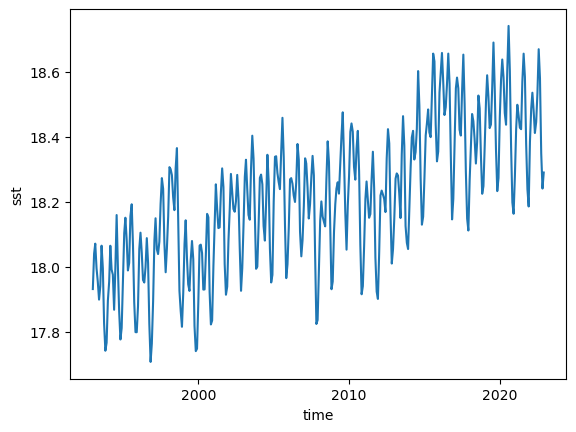

In [31]:
weights = areacell_xarray*OISST_landsea_mask.mask #Defining a new variable via the function to omit SST data from 
                                                  #land areas. Done by multiplying areaceell_xarray by land_sea_mask
weighted_average_SST = SST.weighted(weights).mean(['lat', 'lon']) 
#Create new variable of weighted SST using calculated weights from above and averaging both variables across the
#globe using lat & lon
weighted_average_SST.plot()

Text(0, 0.5, 'Mean Sea Surface Temperature (Celsius)')

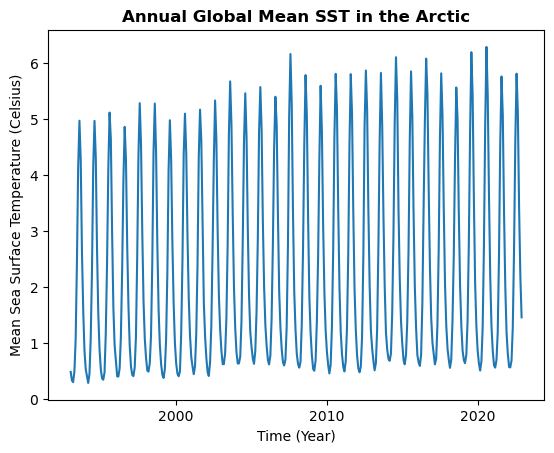

In [32]:
SST_arctic = SST.sel(lat=slice(55,90))
lat_sst_arc = SST_arctic.coords['lat'].values # Defining 1-D numpy array of model's latitude values from SST_OISST variable
lon_sst_arc = SST_arctic.coords['lon'].values # Defining 1-D numpy array of model's longitude values from SST_OISST variable
areacell = standard_grid_cell_area(lat_sst_arc,lon_sst_arc)
areacell_xarray = xr.DataArray(areacell,dims=({'lat':180, 'lon':360}),  
                                                coords=(SST_arctic.coords['lat'],\
                                                        SST_arctic.coords['lon'])) 
weights = areacell_xarray*OISST_landsea_mask.mask
weighted_average_SST = SST.weighted(weights).mean(['lat', 'lon']) 
weighted_average_SST.plot()
plt.title("Annual Global Mean SST in the Arctic", fontweight='bold')
plt.xlabel('Time (Year)')
plt.ylabel('Mean Sea Surface Temperature (Celsius)')

In [33]:
SST_antarc = SST.sel(lat=slice(-55,-90))
lat_sst_ant = SST_antarc.coords['lat'].values # Defining 1-D numpy array of model's latitude values from SST_OISST variable
lon_sst_ant = SST_antarc.coords['lon'].values # Defining 1-D numpy array of model's longitude values from SST_OISST variable
areacell = standard_grid_cell_area(lat_sst_ant,lon_sst_ant)
areacell_xarray = xr.DataArray(areacell,dims=({'lat':180, 'lon':360}),  
                                                coords=(SST_antarc.coords['lat'],\
                                                        SST_antarc.coords['lon'])) 
weights = areacell_xarray*OISST_landsea_mask.mask
weighted_average_SST = SST.weighted(weights).mean(['lat', 'lon']) 
weighted_average_SST.plot()
plt.title("Annual Global Mean SST in Antarctic", fontweight='bold')
plt.xlabel('Time (Year)')
plt.ylabel('Mean Sea Surface Temperature (Celsius)')

IndexError: index 1 is out of bounds for axis 0 with size 0

#### Produce a figure with 4 subplots that shows the global seasonal time-averaged (1993 to 2022) SST.

In [34]:
SST_seasonal = SST.groupby('time.season').mean(dim='time')

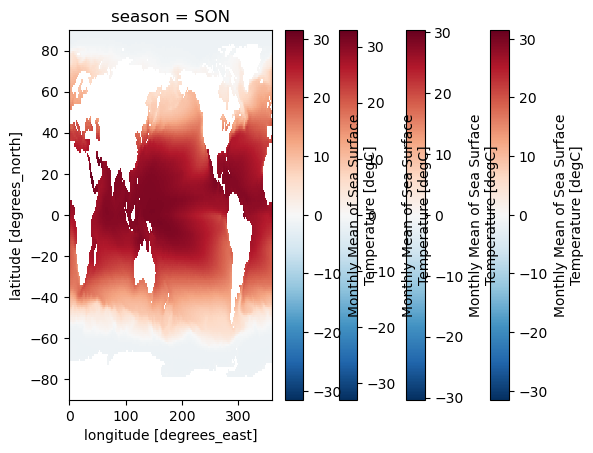

In [25]:
SST_seasonal
winter = SST_seasonal.sel(season='DJF')
spring = SST_seasonal.sel(season='MAM')
summer = SST_seasonal.sel(season='JJA')
fall = SST_seasonal.sel(season='SON')

fall.plot()
spring.plot()
summer.plot()
winter.plot()
                         

In [4]:
month_length = SST_monthly.time.dt.days_in_month #Create an array of the days in each month from SST_monthly array. This will later be used to calculate time weighted SST averages

In [8]:
month_length.sel(time=slice('1993-01-01','1993-12-01')) #Slicing array for 1993 data

<xarray.DataArray 'days_in_month' (time: 12)>
array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
Coordinates:
  * time     (time) object 1993-01-01 00:00:00 ... 1993-12-01 00:00:00
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T
    actual_range:   [66474. 81630.]

In [9]:
month_weights = month_length.groupby('time.year') / month_length.groupby('time.year').sum() #Function for time weighted averages within a given year based on the number of days
month_weights.sel(time=slice('1993-01-01','1993-12-01')) #Slice out array for 1993

<xarray.DataArray 'days_in_month' (time: 12)>
array([0.08493151, 0.07671233, 0.08493151, 0.08219178, 0.08493151,
       0.08219178, 0.08493151, 0.08493151, 0.08219178, 0.08493151,
       0.08219178, 0.08493151])
Coordinates:
  * time     (time) object 1993-01-01 00:00:00 ... 1993-12-01 00:00:00
    year     (time) int64 1993 1993 1993 1993 1993 ... 1993 1993 1993 1993 1993

### Produce a visualization of the average of the most recent 5 year average minus the first 5 years and describe the spatial patterns observed.

In [ ]:
#Subtract 2017-2022 avg from 1993-1998 avg. then plot

### Repeat the analysis above but considering the seasonal differences.

### Assess the annual - mean SST anomalies in 2022 compared to the 1993 to 2022 climatological average. What patterns stand out in 2022? 